In [223]:
import plotly.express as px
import plotly.offline as pyo
import pandas as pd
import seaborn as sns
import os

In [8]:
df=pd.read_csv("gdp.csv")

In [16]:
df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10
...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10
11503,Zimbabwe,ZWE,2013,1.545177e+10
11504,Zimbabwe,ZWE,2014,1.589105e+10
11505,Zimbabwe,ZWE,2015,1.630467e+10


## check the description of column

In [20]:
df.corr(numeric_only=True)

,Year,Value
Year,1.000000,0.161887
Value,0.161887,1.000000


<Axes: >

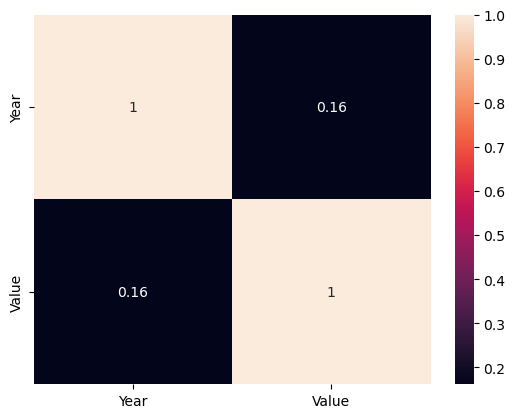

In [30]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [34]:
df.isnull().sum()

Country Name    0
Country Code    0
Year            0
Value           0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11507 entries, 0 to 11506
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  11507 non-null  object 
 1   Country Code  11507 non-null  object 
 2   Year          11507 non-null  int64  
 3   Value         11507 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 359.7+ KB


In [46]:
df["Country Name"].describe()

count                    11507
unique                     256
top       Hong Kong SAR, China
freq                        57
Name: Country Name, dtype: object

In [51]:
df["Country Code"].describe()

count     11507
unique      256
top         HKG
freq         57
Name: Country Code, dtype: object

## analysis the Arab World

In [79]:
df_pr=df[df["Country Name"]=="Arab World"]

In [73]:
df[df["Country Name"]=="Arab World"]["Value"].min()

25760683041.0857

<Axes: xlabel='Year', ylabel='Value'>

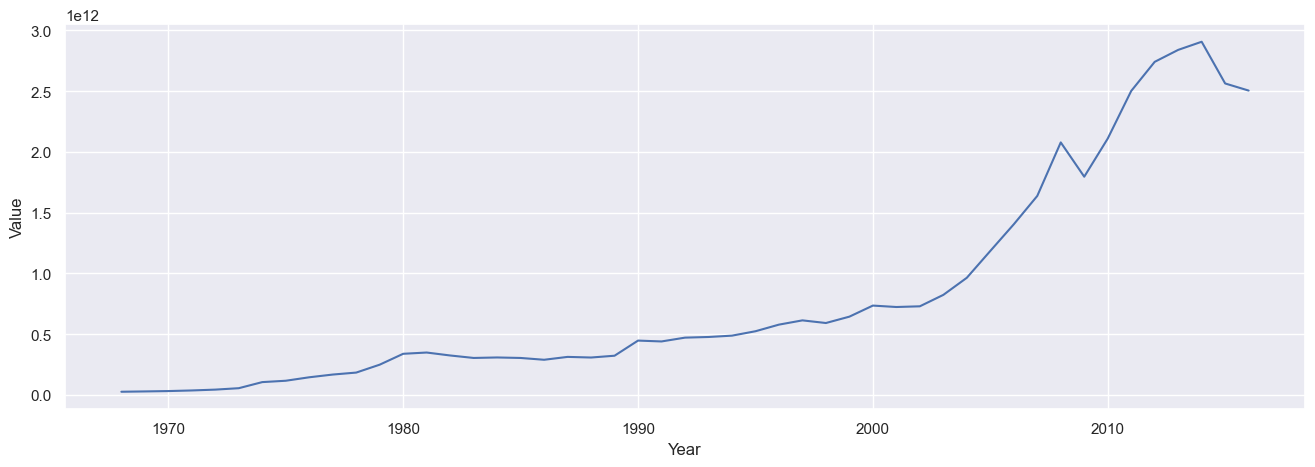

In [95]:
# graph line
sns.set(rc={"figure.figsize":(16,5)})
sns.lineplot(data=df_pr,x="Year",y="Value")


## find the gdp growth

In [107]:
data=df_pr.values


In [125]:
gdp_per=[0]
for i in range(1,len(data)):
    prev=data[i-1][3]
    curr=data[i][3]
    gdp_per.append(round((curr-prev)*100/prev,2))
    

In [133]:
df_pr.assign(GDP = gdp_per)

,Country Name,Country Code,Year,Value,Growth,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91,18.91
5,Arab World,ARB,1973,5.501839e+10,27.02,27.02
6,Arab World,ARB,1974,1.051458e+11,91.11,91.11
7,Arab World,ARB,1975,1.163370e+11,10.64,10.64
8,Arab World,ARB,1976,1.448462e+11,24.51,24.51
9,Arab World,ARB,1977,1.673083e+11,15.51,15.51


## gdp growth for the full country

In [139]:
df.head(3)

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10


In [153]:
final_data = []

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]

    data = df_pr.values
    gdp_change = [0]

    for i in range(1,len(data)):

        prev = data[i-1][3]
        cur = data[i][3]

        gdp_change.append(round(((cur - prev) / prev)*100,2))

    df_pr = df_pr.assign(GDP = gdp_change)
    final_data.append(df_pr)

In [161]:
# concat into the final dataframe
data=pd.concat(final_data,axis=0)
data

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [165]:
data.head()

,Country Name,Country Code,Year,Value,GDP
0,Arab World,ARB,1968,2.576068e+10,0.00
1,Arab World,ARB,1969,2.843420e+10,10.38
2,Arab World,ARB,1970,3.138550e+10,10.38
3,Arab World,ARB,1971,3.642691e+10,16.06
4,Arab World,ARB,1972,4.331606e+10,18.91


In [169]:
data.describe()

,Year,Value,GDP
count,11507.000000,1.150700e+04,11507.000000
mean,1991.265230,1.005972e+12,8.359845
std,15.886648,4.533056e+12,16.057640
min,1960.000000,8.824448e+06,-79.640000
25%,1978.000000,2.056874e+09,0.880000
50%,1993.000000,1.436880e+10,7.510000
75%,2005.000000,1.796394e+11,14.630000
max,2016.000000,7.904923e+13,479.820000


In [171]:
df.groupby('Country Name').max()['Value'].sort_values(ascending = False).head(50)

Country Name
World                                                   7.904923e+13
High income                                             5.036240e+13
OECD members                                            4.937008e+13
Post-demographic dividend                               4.673504e+13
IDA & IBRD total                                        2.948247e+13
Low & middle income                                     2.870476e+13
Middle income                                           2.829277e+13
IBRD only                                               2.739661e+13
Europe & Central Asia                                   2.365470e+13
East Asia & Pacific                                     2.248043e+13
Upper middle income                                     2.221220e+13
North America                                           2.016030e+13
Late-demographic dividend                               1.970310e+13
European Union                                          1.913667e+13
United States        

In [189]:
#data_1=data[data["Country Name"]=="World"]

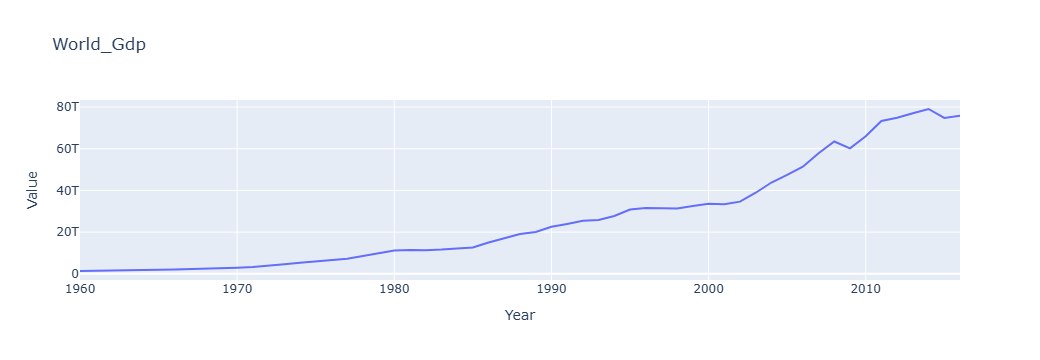

In [209]:
data_1=data[data["Country Name"]=="World"]
dia=px.line(data_1,x="Year",y="Value",title="World_Gdp")
dia

In [213]:
pyo.plot(dia, filename = 'World GDP.html')

'World GDP.html'

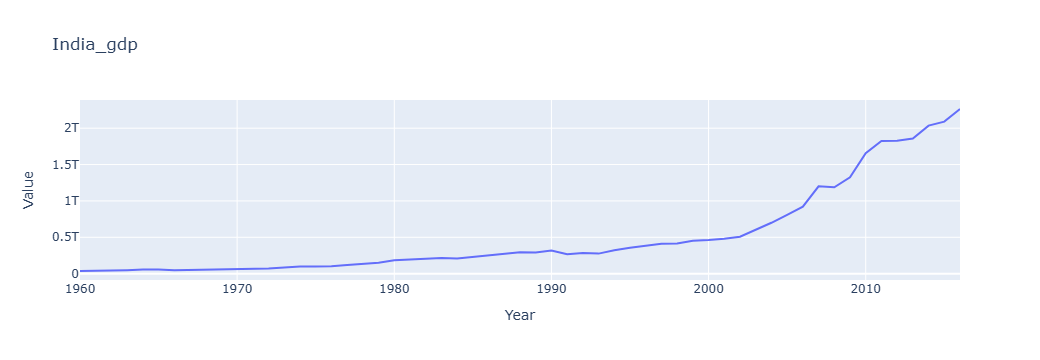

In [215]:
data_1=data[data["Country Name"]=="India"]
dia=px.line(data_1,x="Year",y="Value",title="India_gdp")
dia

In [219]:
pyo.plot(dia, filename = 'India.html')

'India.html'

## create the graph for the each of country

In [231]:
os.mkdir('Gdp_Indiviual')
for country_name in data["Country Name"]:
    data_1=data[data["Country Name"]==country_name]
    dia=px.line(data_1,x="Year",y="Value",title=country_name+"_gdp")
    pyo.plot(dia, filename = "Gdp_Indiviual/"+country_name+'.html',auto_open=False)
     
    



KeyboardInterrupt



##  GDP of Each Country WRT 80T

In [ ]:
os.mkdir('GDP Individual WRT World')

for country_name in df['Country Name'].unique():
    
    df_pr = df[df['Country Name'] == country_name]
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = country_name + ' GDP Analysis', range_y = [0,80000000000000])
    pyo.plot(fig, filename = 'GDP Individual WRT World/' + country_name + '.html', auto_open = False)

##  GDP of each Country

In [243]:
fig = px.line(df, x = 'Year', y = 'Value', title = 'GDP Analysis of All Countries', color = 'Country Name')

pyo.plot(fig, filename = 'Countries GDP.html') 

'Countries GDP.html'

In [245]:
c1 = df[df['Country Name'] == 'China']
c2 = df[df['Country Name'] == 'India']

In [265]:
df_pr = pd.concat([c1,c2],axis = 0)

In [271]:
df_pr

,Country Name,Country Code,Year,Value
4046,China,CHN,1960,5.971647e+10
4047,China,CHN,1961,5.005687e+10
4048,China,CHN,1962,4.720936e+10
4049,China,CHN,1963,5.070680e+10
4050,China,CHN,1964,5.970834e+10
...,...,...,...,...
6126,India,IND,2012,1.827638e+12
6127,India,IND,2013,1.856722e+12
6128,India,IND,2014,2.035393e+12
6129,India,IND,2015,2.089865e+12


In [284]:
fig=px.line(df_pr,x="Year",y="Value",title="Gdp_of_the_two_country",color="Country Name")
pyo.plot(fig, filename = 'IND_CHN.html')

'IND_CHN.html'

## world vs china Gdp

In [291]:
c1 = df[df['Country Name'] == 'China']
c2 = df[df['Country Name'] == 'World']

df_pr = pd.concat([c1,c2],axis = 0)

fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison | World & China', color = 'Country Name')

pyo.plot(fig, filename = 'WLD_CHN.html')

'WLD_CHN.html'

## compare the gdp of specific contries

In [318]:
lst = ['IND','ITA', 'USA', 'CHN']

dfs = []
for i in lst:
    dfs.append(df[df['Country Code'] == i])
    
    df_pr = pd.concat(dfs, axis = 0)



In [324]:
fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '|'.join(lst), color = 'Country Name')

pyo.plot(fig, filename = '_'.join(lst) + '.html')

'IND_ITA_USA_CHN.html'

## function to show  the gdp differences

In [335]:
def compare_gdp(lst, isOpen):
    
    dfs = []
    for i in lst:
        dfs.append(df[df['Country Code'] == i])

        df_pr = pd.concat(dfs, axis = 0)
        
    fig = px.line(df_pr, x = 'Year', y = 'Value', title = 'GDP Comparison - ' + '|'.join(lst), 
                  color = 'Country Name')
    pyo.plot(fig, filename = '_'.join(lst) + '.html', auto_open = isOpen)
    

In [343]:
compare_gdp(['IND','USA'],True)

## compare the gdp 

In [355]:
def compare_gdp(lst, isOpen):
    
    dfs = []
    for i in lst:
        dfs.append(data[data['Country Code'] == i])# data frame
        

        df_pr = pd.concat(dfs, axis = 0)
        
    fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Comparison - ' + '|'.join(lst), 
                  color = 'Country Name')
    pyo.plot(fig, filename = '_'.join(lst) + '.html', auto_open = isOpen)

In [359]:
compare_gdp(['IND','USA'],True)

## compare the gdp growth of all contries

In [367]:
      
fig = px.line(data, x = 'Year', y = 'GDP', title = 'GDP Comparison - ' + '|'.join(lst), 
                  color = 'Country Name')
pyo.plot(fig, filename = '_'.join(lst) + '.html', auto_open = True)

'IND_ITA_USA_CHN.html'

## gdp growth of countries between 1960 -2016

In [373]:
dfs = []

for country_name in data['Country Name'].unique():
    df_pr = data[data['Country Name'] == country_name]
    
    if (len(df_pr) == 57):
        dfs.append(df_pr)
        
df_pr = pd.concat(dfs, axis = 0)

In [375]:
df_pr

,Country Name,Country Code,Year,Value,GDP
49,Caribbean small states,CSS,1960,2.004785e+09,0.00
50,Caribbean small states,CSS,1961,2.169733e+09,8.23
51,Caribbean small states,CSS,1962,2.289495e+09,5.52
52,Caribbean small states,CSS,1963,2.431592e+09,6.21
53,Caribbean small states,CSS,1964,2.626896e+09,8.03
...,...,...,...,...,...
11502,Zimbabwe,ZWE,2012,1.424249e+10,17.72
11503,Zimbabwe,ZWE,2013,1.545177e+10,8.49
11504,Zimbabwe,ZWE,2014,1.589105e+10,2.84
11505,Zimbabwe,ZWE,2015,1.630467e+10,2.60


In [377]:

fig = px.line(df_pr, x = 'Year', y = 'GDP', title = 'GDP Growth', color = 'Country Name')

pyo.plot(fig, filename = 'GDP Growth.html', auto_open = True)

'GDP Growth.html'